In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
## which returns list of the attributes and methods ... dir() tries to return a valid list of attributes 
## of the object it is called upon

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df.shape

(150, 4)

In [17]:
df['target']=iris.target

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [29]:
df['flower_name']=df['target'].apply(lambda x : iris.target_names[x])

In [31]:
df.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor


In [33]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [35]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [36]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


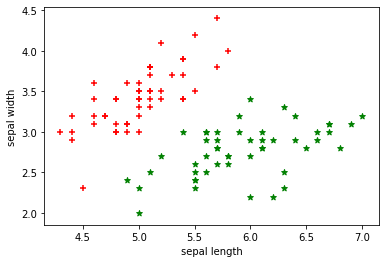

In [46]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='+',c='r')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='*',c='g')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

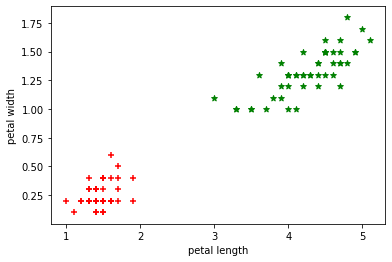

In [49]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='+',c='r')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='*',c='g')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

In [54]:
X=df.drop(['target','flower_name'],axis=1)
y=df['target']

In [56]:
X=X.values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [59]:
from sklearn.svm import SVC

In [60]:
svm =SVC()

In [62]:
svm.fit(X_train,y_train)

D:\AnacondaDistribution\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
svm.predict(X_test)

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 0, 2, 1, 0, 2, 1])

In [65]:
svm.score(X_test,y_test)

0.9666666666666667

In [66]:
## Checking if any other paramter change can increase the accuracy

In [67]:
svm =SVC(kernel='poly')

In [68]:
svm.fit(X_train,y_train)

D:\AnacondaDistribution\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
svm.predict(X_test)

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 2, 0, 2, 1, 0, 2, 1])

In [71]:
svm.score(X_test,y_test)

1.0